# Lab 03

In this lab, we will first create a dataset for Linear regression, then build different methods to solve simple linear regression. 
We will go from generating synthetic data to optimizing the parameters of our model and plotting the results.

Feedbacks for Max:
- The word Dataset here can be seen as a dataframe (pandas) later on yet here ndarray (numpy) is used.
- Synthetic data is basically created data that is not real. It is generated by a function of your choice.
- Parameters are the coefficients of the line that you want to estimate. In this case, the slope (a) and the intercept (b). To distinguish with the idea of hyperparameters, that instead are the parameters that you set before training the model for it to adjust the learning behaviour of the data.
- Plotting means to display the data in a graph. In this case, you will plot the data points and the line that you have estimated.

## Exercise 1

Build a class to generate data sampled from 2D lines:
- $y = ax + b + Eps$
- the noise Eps is Normal centered on 0, with a parameterized variance.
- $x_i$ is in the range \[-10 , 10\].

Feedbacks for Max: 
- The noise term ‘Eps’ here represents random variation in the data, often referred to as ‘epsilon’ (\epsilon) in statistical models. This noise is added to make the data more realistic by simulating natural variation, and in this case, it’s generated from a normal distribution centered at 0.
- A ‘parameterized variance’ means that the level of spread or deviation of this noise can be controlled by an input parameter. The variance is a measure of how far data points tend to deviate from the mean—in this case, zero. Higher variance means more spread around the line, simulating noisier data.

This class should allow you to generate any number of points.

Build a  method that allow you to generate training, and testing datasets:
- The method takes as input the number of points generated, and the ratio of points between training and testing set (between 0 and 1).

Feedbacks for Max:
 - In machine learning, data is often split into ‘training’ and ‘testing’ datasets. The training dataset is used to fit or ‘learn’ the model parameters (like the line’s slope and intercept), while the testing dataset evaluates how well the model generalises to new, unseen data. The ‘ratio’ refers to the fraction of data allocated to training vs. testing. For instance, a ratio of 0.8 would mean 80% of the data is used for training and 20% for testing.
- Later on, you do not need to re implement but may use train_test_split from sklearn.model_selection to split the dataset easily according to the specified ratio. Common ratios are 0.8 for training (80%) and 0.2 for testing (20%) or 0.7 for training and 0.3 for testing. These ratios aim to ensure the model has enough data to learn patterns while retaining sufficient data for reliable testing.

Finally, implement a method that allows to display:
- the dataset points 
- the actual line that was used to generate the points
- optional line parameters to display the predicted line


In [92]:
# import numpy as np
# import math
# from numpy.random import default_rng
# rng = default_rng()
# 
# import matplotlib.pyplot as plt
# 
# class Line2D:
# 
#     def __init__( self, a, b, noise_variance = 1 ):
# 
#         self.a = a
#         self.b = b
#         self.variance = noise_variance
# 
#     def generate_points(self, N):
# 
#         # Generate random X
#         X = rng.uniform(low=-10, high=10, size=N)
# 
#         # Generate random noise
#         epsilon = rng.normal(0, math.sqrt(self.variance), N)
# 
#         # Calculate corresponding y
#         y = self.a * X + self.b + epsilon
# 
#         return X, y
# 
#     def generate_dataset(self, N, ratio_train = 0.6):
# 
#         X_train , y_train = self.generate_points( int(N*ratio_train) )
#         X_test , y_test = self.generate_points( N - int(N*ratio_train) )
# 
#         return (X_train, y_train), (X_test, y_test)
# 
#     def plot( self, X, y, predicted_a = None, predicted_b = None):
# 
#         plt.scatter(X, y, marker='.')
# 
#         x_start = -10
#         x_end = 10
# 
#         if predicted_a and predicted_b:
#           y_start = -10*predicted_a + predicted_b
#           y_end = 10 * predicted_a + predicted_b
#           plt.plot( (x_start, x_end), (y_start, y_end), 'r')
#         plt.show()

In [93]:
# data = Line2D( 0.5, 4, noise_variance= 3 )
# X_vis, y_vis = data.generate_points(1000)
# data.plot(X_vis, y_vis)
# data.plot(X_vis, y_vis, predicted_a = 0.5, predicted_b = 2)

In [1]:
!pip install matplotlib

In [2]:
import math
from typing import Tuple, Optional

import matplotlib.pyplot as plt
import numpy as np

global_seed = 42 # nice for reproducibility
rng = np.random.default_rng(seed=42)

class Line2D:
    def __init__(self, slope: float, intercept: float, noise_variance: float = 1.0, x_min: float = -10, x_max: float = 10) -> None:
        """
        Initialises the Line2D instance with a specified slope, intercept, noise variance, and x-range.
        """
        self.slope = slope
        self.intercept = intercept
        self.variance = noise_variance
        self.x_min = x_min
        self.x_max = x_max
    
    def generate_points(self, N: int) -> Tuple[np.ndarray, np.ndarray]:
        """
        Generates `N` points based on the line equation `y = slope * x + intercept + epsilon`, where `epsilon`
        is Gaussian noise with mean 0 and specified variance.
        """
        X = rng.uniform(low=self.x_min, high=self.x_max, size=N)
        epsilon = rng.normal(loc=0, scale=math.sqrt(self.variance), size=N)
        y = (self.slope * X) + self.intercept + epsilon
        
        return X, y
    
    def generate_dataset(self, N: int, ratio_train: float = 0.6) -> Tuple[Tuple[np.ndarray, np.ndarray], Tuple[np.ndarray, np.ndarray]]:
        """
        Generates and splits `N` points into training and testing datasets based on the provided ratio.
        """
        X, y = self.generate_points(N=N)
        split_idx = int(N * ratio_train)
        
        X_train, y_train = X[:split_idx], y[:split_idx]
        X_test, y_test = X[split_idx:], y[split_idx:]
        return (X_train, y_train), (X_test, y_test)
    
    def plot(
            self, 
            X: np.ndarray, 
            y: np.ndarray, 
            true_slope: float, 
            true_intercept: float, 
            predicted_slope: Optional[float] = None, 
            predicted_intercept: Optional[float] = None
    ) -> None:
        """
        Plots the generated data points and the specified true line for consistency across cells.
        
        Parameters:
        -----------
        X : np.ndarray
            Array of x-coordinates for the data points.
        y : np.ndarray
            Array of y-coordinates for the data points.
        true_slope : float
            Slope of the consistent true line to display.
        true_intercept : float
            Intercept of the consistent true line to display.
        predicted_slope : float, optional
            Slope of the predicted line. Default is None, which omits the predicted line.
        predicted_intercept : float, optional
            Intercept of the predicted line. Default is None, which omits the predicted line.
        
        Returns:
        --------
        None
        """
        plt.scatter(X, y, marker='.')
        
        x_vals = np.array([self.x_min, self.x_max])
        y_true_vals = (true_slope * x_vals) + true_intercept
        plt.plot(x_vals, y_true_vals, 'b-', label="True line")
        
        if None not in (predicted_slope, predicted_intercept):
            y_pred_vals = (predicted_slope * x_vals) + predicted_intercept
            plt.plot(x_vals, y_pred_vals, 'r--', label="Predicted line")
        
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()

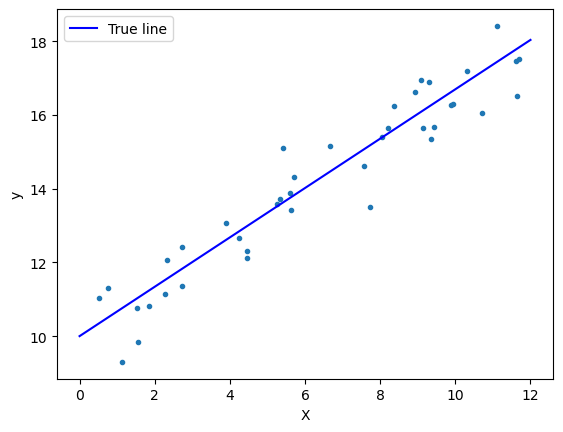

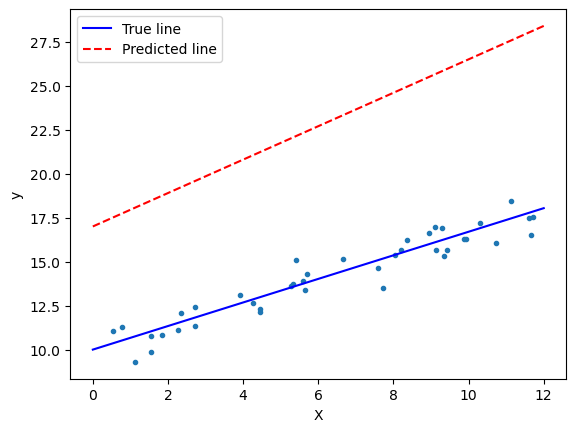

In [3]:
data = Line2D(slope=0.67, intercept=10, noise_variance=1, x_min=0, x_max=12)
(X_train, y_train), (X_test, y_test) = data.generate_dataset(N=50, ratio_train=0.8)

# Consistent plot with the true line on the training data
data.plot(X=X_train, y=y_train, true_slope=0.67, true_intercept=10)

# Plotting a predicted line for comparison on the training data
data.plot(X=X_train, y=y_train, true_slope=0.67, true_intercept=10, predicted_slope=0.95, predicted_intercept=17)


## Exercise 2

Now, we will solve Linear Regression using the different methods we saw during the lecture.

First of all, we will build a class that will define how all Linear Regression subclasses behave.
Some methods are common to all subclasses that we will implement.

Feedback for Max:

- The goal here is to create a ``base class'' (jargon to recall) for linear regression, from which different regression models can inherit. A base class provides a consistent structure and shared methods that can be used or overridden by all linear regression models. This allows us to define common functionalities (like fitting, predicting, and evaluating models) in a single place.

We will evaluate all our methods using the Mean Square Error.

Why this instead of total sum of squares?

Feedback for Max:
- The total sum of squares is the sum of squared differences between observed 
 values and the mean of those values, and is used to quantify the total variability in the data. 
 However, it doesn't consider predictions y_hat; it's merely a baseline to understand data spread. 
 MSE, on the other hand, specifically measures how well a model's predictions align 
 COMPARED to actual outcomes, making it a more informative metric for model evaluation

In [4]:
# class LinearRegression:
# 
#     def __init__(self):
# 
#         self.estimated_a = 0
#         self.estimated_b = 0
# 
#     def cost(self, X, y):
#         y_pred = self.predict(X)
#         calculated_cost = np.sum( (y_pred - y)**2)
#         return calculated_cost
# 
#     def predict(self, X):
#         y_pred = X * self.estimated_a + self.estimated_b
#         return y_pred
# 
#     def evaluate(self, X_test, y_test):
# 
#         # Total Sum of Squares
#         SS_tot = self.cost(X_test, y_test)
# 
#         # Mean squares
#         MSE = SS_tot/len(X_test)
# 
#         return MSE

In [5]:
import numpy as np

class LinearRegression:
    """
    A base class for Linear Regression models, providing shared methods for
    prediction, evaluation, and cost calculation.

    Attributes:
    -----------
    estimated_slope : float
        Estimated slope (coefficient) of the linear model.
    estimated_intercept : float
        Estimated intercept of the linear model.

    Methods:
    --------
    cost(X: np.ndarray, y: np.ndarray) -> float
        Computes the cost as the sum of squared errors between predictions and actual values.
    predict(X: np.ndarray) -> np.ndarray
        Generates predictions based on input data X.
    evaluate(X_test: np.ndarray, y_test: np.ndarray) -> float
        Evaluates the model using Mean Square Error on test data.
    """
    
    def __init__(self) -> None:
        """
        Initialises the LinearRegression instance with default values for the estimated slope and intercept.
        """
        self.estimated_slope: float = 0.0  
        self.estimated_intercept: float = 0.0  
        
    def cost(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Calculates the cost function as the sum of squared errors between the predicted and actual values.

        Parameters:
        -----------
        X : np.ndarray
            Input feature array.
        y : np.ndarray
            Actual target values corresponding to X.

        Returns:
        --------
        float
            The sum of squared errors.
        """
        y_pred = self.predict(X)
        calculated_cost = np.sum((y_pred - y) ** 2)
        return calculated_cost
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts target values based on the input feature array and current estimated slope and intercept.

        Parameters:
        -----------
        X : np.ndarray
            Input feature array.

        Returns:
        --------
        np.ndarray
            Predicted target values.
        """
        y_pred = X * self.estimated_slope + self.estimated_intercept
        return y_pred
    
    def evaluate(self, X_test: np.ndarray, y_test: np.ndarray) -> float:
        """
        Evaluates the model by calculating the Mean Square Error (MSE) on the test dataset.

        Parameters:
        -----------
        X_test : np.ndarray
            Test feature array.
        y_test : np.ndarray
            Actual target values for the test set.

        Returns:
        --------
        float
            The Mean Square Error (MSE) of the model on the test data.
        """
        # Total Sum of Squares (Cost)
        total_sum_of_squares = self.cost(X_test, y_test)
        
        # Mean Square Error
        MSE = total_sum_of_squares / len(X_test)
        
        return MSE

Now that the LinearRegression class is defined, we can create different subclasses that implement the approaches we discussed in the lecture.

Feedbacks for Max:
- A ``subclass'' inherits from the base class (LinearRegression in this case) but can provide its own specific implementation for certain methods. Here, each subclass will represent a different method for fitting a linear regression model to data, such as ordinary least squares, gradient descent, etc. This structure allows us to keep shared functionality in the base class while letting each approach define 
its unique `fit` method.

You need to implement the `fit` method that will update the estimated parameters.

Feedbacks for Max:
- The `fit` method is a conventional name used in ML, which in this very instance means calculates and updates the estimated slope and intercept (parameters) of the linear regression model based on the given data.

In [6]:
# class RandomSearch(LinearRegression):
#     
#     def __init__(self, **kwargs):
# 
#       super().__init__(**kwargs)
# 
#       self.cost_history = []
# 
#     def fit(self, X, y, n_steps):
# 
#       best_a = self.estimated_a
#       best_b = self.estimated_b
# 
#       for step in range(n_steps):
#         # generate random estimated_a and estimated_b through uniform distribution, range -10 to 10
#         self.estimated_a = ...
#         self.estimated_b = ...
# 
#         cost = ...
#         self.cost_history.append(cost)
# 
#         if min(self.cost_history) == cost:
#           # update best_a and best_b
#           pass
# 
#       self.estimated_a = best_a
#       self.estimated_b = best_b
#         
# X_train, y_train = data.generate_points(10000)
# 
# rs = RandomSearch()
# rs.fit(X_train, y_train, 10000)
# 
# X_test, y_test = data.generate_points(1000)
# print(rs.estimated_a, rs.estimated_b)
# print(rs.evaluate(X_test, y_test))

In [7]:
import numpy as np
from typing import Tuple

class RandomSearch(LinearRegression):
    """
    A class implementing Random Search to fit a linear regression model by minimizing 
    the Mean Squared Error between predictions and actual values.

    Attributes:
    -----------
    cost_history : List[dict]
        Stores the cost for each random parameter combination tested during fitting.
    
    Methods:
    --------
    fit(X: np.ndarray, y: np.ndarray, n_steps: int = 1000, 
        slope_range: Tuple[float, float] = (-10, 10), intercept_range: Tuple[float, float] = (-10, 10)) -> None
        Performs random search over a fixed number of steps to find the best-fitting slope 
        and intercept parameters within specified ranges. If enabled, early stopping interrupts 
        the search if no improvement is seen for a specified number of iterations.
    """
    
    def __init__(self) -> None:
        """
        Initialises the RandomSearch instance, preparing an empty cost history.
        """
        super().__init__()
        self.cost_history: List[dict] = []

    def fit(
        self, 
        X: np.ndarray, 
        y: np.ndarray, 
        n_steps: int = 1000, 
        slope_range: Tuple[float, float] = (-10, 10), 
        intercept_range: Tuple[float, float] = (-10, 10),
        early_stop: bool = False,
        no_improvement_threshold: int = 50
    ) -> None:
        """
        Performs random search over `n_steps` iterations to find the optimal slope and intercept
        values that minimize the cost (Mean Squared Error) on the training data. Random parameters 
        are generated within the specified ranges for slope and intercept, and the parameters with 
        the lowest cost are stored. If enabled, the process stops early if no improvement is seen 
        over a specified number of iterations.

        Parameters:
        -----------
        X : np.ndarray
            Input feature array for training.
        y : np.ndarray
            Actual target values for training.
        n_steps : int, optional
            Number of iterations for the random search, default is 1000.
        slope_range : Tuple[float, float], optional
            Range (min, max) for random slope values, default is (-10, 10).
        intercept_range : Tuple[float, float], optional
            Range (min, max) for random intercept values, default is (-10, 10).
        early_stop : bool, optional
            If True, stops the search early if no improvement is seen for `no_improvement_threshold` iterations.
        no_improvement_threshold : int, optional
            Number of iterations without improvement to allow before stopping, default is 50.
        
        Returns:
        --------
        None
        """
        best_cost = float("inf")
        best_intercept = None
        best_slope = None
        no_improvement_count = 0
        
        for step in range(n_steps):
            random_slope = rng.uniform(low=slope_range[0], high=slope_range[1])
            random_intercept = rng.uniform(low=intercept_range[0], high=intercept_range[1])
            
            self.estimated_slope = random_slope
            self.estimated_intercept = random_intercept
            
        
            current_cost = self.cost(X, y)
            
            self.cost_history.append({
                "slope": random_slope,
                "intercept": random_intercept,
                "cost": current_cost
            })
            
            if current_cost < best_cost:
                best_cost = current_cost
                best_intercept = random_intercept
                best_slope = random_slope
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                
            if early_stop and no_improvement_count >= no_improvement_threshold:
                print(f"Early stopping at step {step} due to no improvement in {no_improvement_count} iterations.")
                break
            
        
        self.estimated_slope = best_slope
        self.estimated_intercept = best_intercept
        

Visualising the training data with the true line...


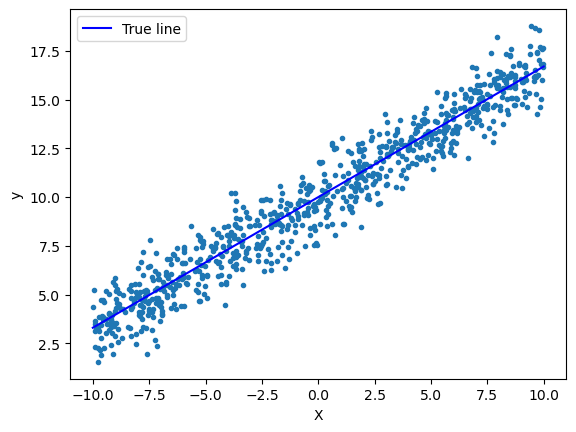

Estimated Slope: 0.08438711075537286
Estimated Intercept: 0.6364771155586846
Mean Square Error on Test Set: 100.42240505763608
Visualising the test data with the predicted and true lines...


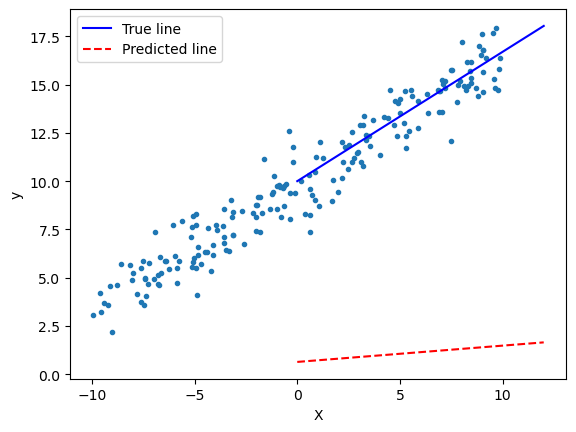

In [8]:
def main():
    true_slope = 0.67
    true_intercept = 10
    noise_variance = 1
    x_min, x_max = -10, 10
    
    synthetic_data = Line2D(
        slope=true_slope, 
        intercept=true_intercept, 
        noise_variance=noise_variance, 
        x_min=x_min, 
        x_max=x_max
    )
    
    (X_train, y_train), (X_test, y_test) = synthetic_data.generate_dataset(N=1000, ratio_train=0.8)

    print("Visualising the training data with the true line...")
    synthetic_data.plot(X=X_train, y=y_train, true_slope=true_slope, true_intercept=true_intercept)

    rs = RandomSearch()
    rs.fit(
        X=X_train, 
        y=y_train, 
        n_steps=20, 
        slope_range=(x_min, x_max),  
        intercept_range=(x_min, x_max),
        early_stop=False,
        no_improvement_threshold=500
    )

    print("Estimated Slope:", rs.estimated_slope)
    print("Estimated Intercept:", rs.estimated_intercept)

    mse = rs.evaluate(X_test, y_test)
    print("Mean Square Error on Test Set:", mse)

    print("Visualising the test data with the predicted and true lines...")
    data.plot(
        X=X_test, 
        y=y_test, 
        true_slope=true_slope,
        true_intercept=true_intercept,
        predicted_slope=rs.estimated_slope, 
        predicted_intercept=rs.estimated_intercept
    )

main()

In [9]:
import numpy as np
from typing import List

class GradientDescent(LinearRegression):
    """
    A class implementing Gradient Descent for fitting a linear regression model by minimizing
    the Mean Squared Error between predictions and actual values.

    Attributes:
    -----------
    lr : float
        Learning rate for the gradient descent algorithm, controlling the step size.
    cost_history : List[float]
        Stores the cost for each epoch, allowing monitoring of convergence.
    
    Methods:
    --------
    fit(X: np.ndarray, y: np.ndarray, number_epochs: int, no_improvement_threshold: int = 50) -> List[float]
        Performs gradient descent over a specified number of epochs to optimize the slope and
        intercept parameters by minimizing the cost function. Stops early if no improvement is seen
        for a given number of epochs.
    """
    
    def __init__(self, learning_rate: float) -> None:
        """
        Initializes the GradientDescent instance with a specified learning rate.

        Parameters:
        -----------
        learning_rate : float
            The step size for updating the parameters during gradient descent.
        """
        super().__init__()
        self.lr = learning_rate
        self.cost_history: List[Dict] = []

    def fit(self, X: np.ndarray, y: np.ndarray, number_epochs: int, early_stop: bool = True, no_improvement_threshold: int = 50) -> None:
        """
        Fits the linear model to the data using gradient descent. Updates the slope and intercept
        by computing gradients and stepping in the direction that minimizes the cost function.
        Stops early if there is no improvement in cost for a specified number of epochs.

        Parameters:
        -----------
        X : np.ndarray
            Input feature array for training.
        y : np.ndarray
            Actual target values for training.
        number_epochs : int
            Number of iterations (epochs) over which to perform gradient descent.
        early_stop : bool, optional
            If True, stops the training early if no improvement is seen for `no_improvement_threshold` epochs.
        no_improvement_threshold : int, optional
            Number of consecutive epochs allowed without improvement before stopping, default is 50.
        """
        best_cost = float("inf")
        best_intercept = None
        best_slope = None
        
        for epoch in range(number_epochs):
            y_pred = self.predict(X)
            errors = y_pred - y
            
            gradient_slope = (2 / len(X)) * np.sum(errors * X)
            gradient_intercept = (2 / len(X)) * np.sum(errors)
            
            self.estimated_slope -= self.lr * gradient_slope
            self.estimated_intercept -= self.lr * gradient_intercept
            
            current_cost = self.cost(X, y)
            
            self.cost_history.append({
                "slope": self.estimated_slope,
                "intercept": self.estimated_intercept,
                "cost": current_cost
            })
            
            if current_cost < best_cost:
                best_cost = current_cost
                best_intercept = self.estimated_intercept
                best_slope = self.estimated_slope
                
        self.estimated_slope = best_slope
        self.estimated_intercept = best_intercept
                
            

Visualising the training data with the true line...


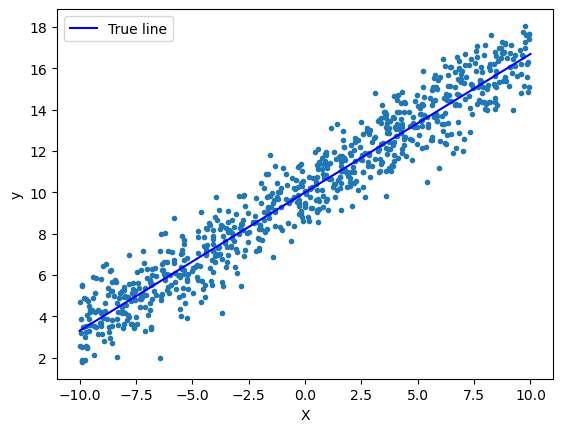

Estimated Slope: 0.675995618097775
Estimated Intercept: 10.068938837353764
Mean Square Error on Test Set: 1.080330132578797
Visualising the test data with the predicted and true lines...


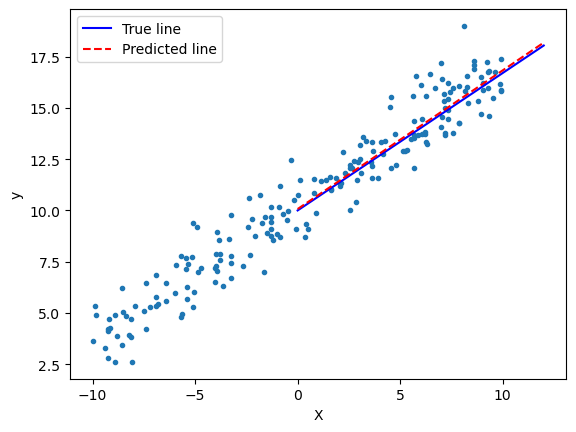

In [20]:
def main():
    true_slope = 0.67
    true_intercept = 10
    noise_variance = 1
    x_min, x_max = -10, 10
    
    synthetic_data = Line2D(
        slope=true_slope, 
        intercept=true_intercept, 
        noise_variance=noise_variance, 
        x_min=x_min, 
        x_max=x_max
    )
    
    (X_train, y_train), (X_test, y_test) = synthetic_data.generate_dataset(N=1000, ratio_train=0.8)

    print("Visualising the training data with the true line...")
    synthetic_data.plot(X=X_train, y=y_train, true_slope=true_slope, true_intercept=true_intercept)

    gd = GradientDescent(learning_rate=0.02)
    gd.fit(
        X=X_train, 
        y=y_train, 
        number_epochs=5000
    )

    print("Estimated Slope:", gd.estimated_slope)
    print("Estimated Intercept:", gd.estimated_intercept)

    mse = gd.evaluate(X_test, y_test)
    print("Mean Square Error on Test Set:", mse)

    print("Visualising the test data with the predicted and true lines...")
    data.plot(
        X=X_test, 
        y=y_test, 
        true_slope=true_slope,
        true_intercept=true_intercept,
        predicted_slope=gd.estimated_slope, 
        predicted_intercept=gd.estimated_intercept
    )

main()

## Exercise 3
For random search and gradient descent, display regression lines in each epoch through the learned parameters (estimated_a, estimated_b) 

In [11]:
def plot_regression_history(cost_history: List[dict], X: np.ndarray, y: np.ndarray) -> None:
    """
    Plots the regression line for each entry in the cost history.

    Parameters:
    -----------
    cost_history : List[dict]
        List containing the slope, intercept, and cost at each epoch/step.
    X : np.ndarray
        Input feature array for training or testing.
    y : np.ndarray
        Actual target values corresponding to X.
    """
    plt.scatter(X, y, marker='.', label="Data points")
    x_vals = np.array([min(X), max(X)])

    first_entry = cost_history[0]
    first_slope = first_entry['slope']
    first_intercept = first_entry['intercept']
    y_first_vals = first_slope * x_vals + first_intercept
    plt.plot(x_vals, y_first_vals, color='yellow', linestyle='--', label="Initial Regression Line", linewidth=2)

    for entry in cost_history[1:-1]:
        slope = entry['slope']
        intercept = entry['intercept']
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, color='orange', linestyle='--', alpha=0.3)

    final_entry = cost_history[-1]
    final_slope = final_entry['slope']
    final_intercept = final_entry['intercept']
    y_final_vals = final_slope * x_vals + final_intercept
    plt.plot(x_vals, y_final_vals, color='red', linestyle='-', label="Final Regression Line", linewidth=3)

    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title("Evolution of Regression Lines")
    plt.show()

Visualising the training data with the true line...


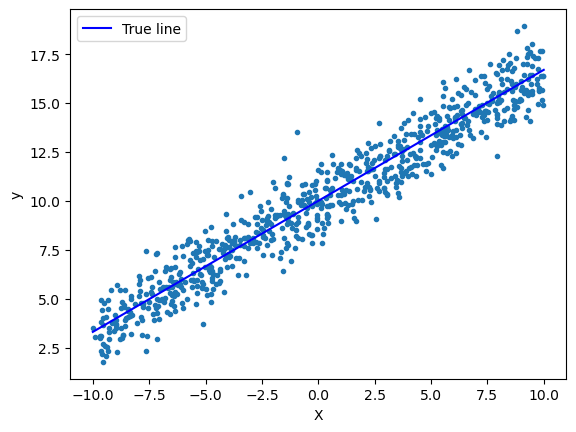

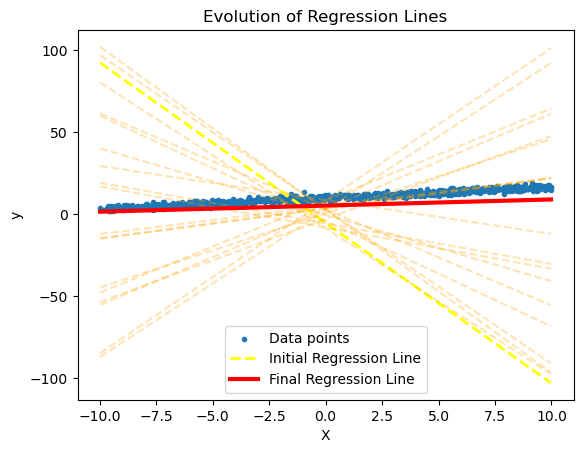

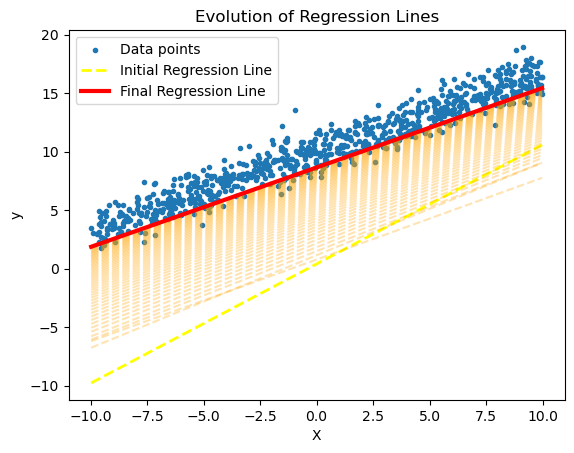

In [15]:
# TODO MAIN for plotting regression history
def main():
    true_slope = 0.67
    true_intercept = 10
    noise_variance = 1
    x_min, x_max = -10, 10
    
    synthetic_data = Line2D(
        slope=true_slope, 
        intercept=true_intercept, 
        noise_variance=noise_variance, 
        x_min=x_min, 
        x_max=x_max
    )
    
    (X_train, y_train), (X_test, y_test) = synthetic_data.generate_dataset(N=1000, ratio_train=0.8)

    print("Visualising the training data with the true line...")
    synthetic_data.plot(X=X_train, y=y_train, true_slope=true_slope, true_intercept=true_intercept)

    rs = RandomSearch()
    rs.fit(
        X=X_train, 
        y=y_train, 
        n_steps=20, 
        slope_range=(x_min, x_max),  
        intercept_range=(x_min, x_max),
        early_stop=False,
        no_improvement_threshold=500
    )
    
    cost_history = sorted(rs.cost_history, key= lambda entry: entry['cost'], reverse=True)
    plot_regression_history(cost_history=cost_history, X=X_train, y=y_train)

    gd = GradientDescent(learning_rate=0.02)
    gd.fit(
        X=X_train, 
        y=y_train, 
        number_epochs=50
    )
    
    cost_history = sorted(gd.cost_history, key= lambda entry: entry['cost'], reverse=True)
    plot_regression_history(cost_history=cost_history, X=X_train, y=y_train)


main()

## Exercise 4

Solve the linear regression problem for different values of line parameters.

Compare the speed of convergence of different approaches depending on the learning rate.

What happens if the learning rate is too high?

## Exercise 5

Use scikit-learn to verify that you obtain similar results.

In [16]:
!pip install scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error

def verification(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Uses scikit-learn's LinearRegression to fit the data and compares results with custom implementations.

    Parameters:
    -----------
    X_train : np.ndarray
        Training feature data.
    y_train : np.ndarray
        Training target values.
    X_test : np.ndarray
        Test feature data.
    y_test : np.ndarray
        Test target values.
    """
    model = SklearnLinearRegression()
    model.fit(X_train.reshape(-1,1), y_train)
    print(f"model slopes {model.coef_}")
    print(f"model intercepts {model.intercept_}")
    
    y_pred = model.predict(X_test.reshape(-1,1))
    calculated_cost = np.sum((y_pred - y_test) ** 2)
    calculated_MSE = calculated_cost / len(y_test)
    
    sklearn_MSE = mean_squared_error(y_test, y_pred)
    
    print(f"MSE (manual): {calculated_MSE}")
    print(f"MSE (sklearn): {sklearn_MSE}")
    
def main():
    true_slope = 0.67
    true_intercept = 10
    noise_variance = 1
    x_min, x_max = -10, 10
    
    synthetic_data = Line2D(
        slope=true_slope, 
        intercept=true_intercept, 
        noise_variance=noise_variance, 
        x_min=x_min, 
        x_max=x_max
    )
    
    (X_train, y_train), (X_test, y_test) = synthetic_data.generate_dataset(N=1000, ratio_train=0.8)
    
    verification(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

main()

model slopes [0.65946184]
model intercepts 10.004425583672033
MSE (manual): 0.926622681956257
MSE (sklearn): 0.926622681956257
